# 전국 신규 민간 아파트 분양가격 동향

2015년 10월부터 2018년 7월까지의 전체 민간 신규아파트 분양가격 동향

In [50]:
conda install -c conda-forge plotnine 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [52]:
conda install -c conda-forge missingno 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import numpy as np
import re 
from plotnine import *

%을 사용하면 터미널에서 사용할 수 있는 유닉스 명령어를 사용하실 수 있습니다. 경로를 불러오는 문제가 있을 때 이 방법을 사용하면 좋습니다.

In [60]:
%pwd

'C:\\Users\\a0102\\Documents\\python study\\source_code'

In [62]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다. 해당 파일을 확인해 봅니다.
%ls data\apt_price\

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4878-6E13

 C:\Users\a0102\Documents\python study\source_code\data\apt_price 디렉터리

2019-04-22  오후 08:48    <DIR>          .
2019-04-22  오후 08:48    <DIR>          ..
2019-04-19  오후 05:58           108,525 전국_평균_분양가격_2018.7월_.csv
2019-04-19  오후 05:58             4,528 지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv
               2개 파일             113,053 바이트
               2개 디렉터리  19,954,106,368 바이트 남음


In [64]:
#데이터불러오기 (pre_sale에 넣어줬음)
pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')
pre_sale.shape #불러온 데이터의 크기

(2890, 5)

In [66]:
pre_sale.head() #위에서 5개의 데이터를 디폴트로. head(10) -> 10개가져옴

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [68]:
pre_sale.tail() #뒤에서 5개 보여줌 

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [70]:
# 데이터 프레임 요약해서 보여줌 ->
#분양가격이 숫자 타입이 아님. 숫자로 계산 할꺼니까 숫자 타입으로 변경하자.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [88]:
#어떤 데이터 형태인지만 볼수 있음 
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [90]:
pre_sale.isnull().sum() #결측치 보여줌 (분양가격 결측치가 140 임)

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [106]:
#44부터 48까지는 한글 안 깨지도록 하는 것 
import matplotlib

In [107]:
from matplotlib import font_manager,rc

In [108]:
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

In [109]:
rc('font',family=font_name)

In [110]:
matplotlib.rcParams['axes.unicode_minus']=False

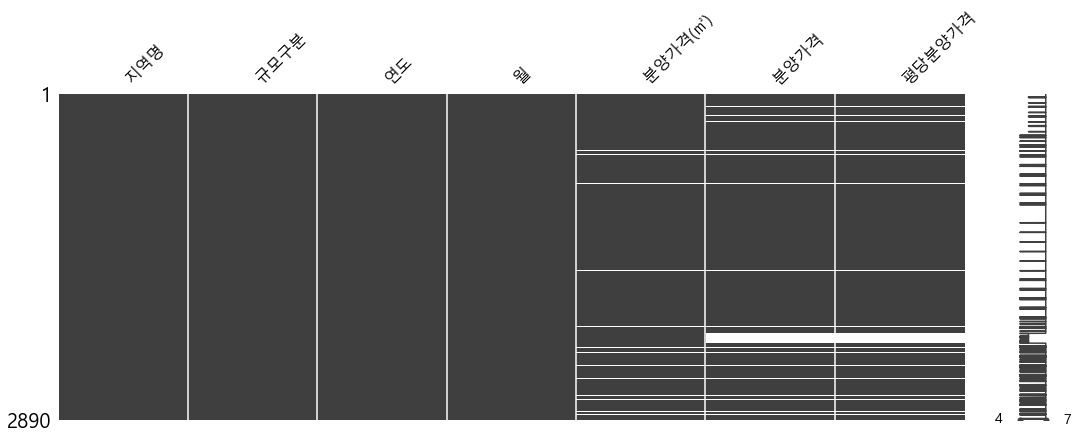

In [111]:
#결측치 보기->(missingno로 시각화 -> 분양가격 그래프에서 하얀 부분들이 결측치)
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [112]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [113]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [114]:
# 분양가격의 타입을 숫자로 변경해 '분양가격'이라는 새 컬럼 만들어서 넣어줌
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격도 새로 만들어줌
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [115]:
pre_sale.info() #연도,월은 string으로 바꿔줘서 object로 바뀜.분양갸격과 평당분양가격이 float으로 새로 생김 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [116]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [117]:
# 분양가격 결측치가 늘어남->object여서 수치에 포함아 되지 않았던 공백란들도 숫자로 바꾸면서 결측치에 들어가게됨
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [118]:
pre_sale.describe() #데이터 요약 (디폴트는 숫자형)

,분양가격,평당분양가격
count,"2,658","2,658"
mean,"3,063","10,109"
std,"1,113","3,672"
min,"1,868","6,164"
25%,"2,348","7,748"
50%,"2,743","9,052"
75%,"3,294","10,869"
max,"8,098","26,723"


In [119]:
#pre_sale.describe?

In [120]:
pre_sale.describe(include=[np.object]) #object형도 describe

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,전남,전용면적 60㎡이하,2016,6,2221
freq,170,578,1020,255,17


In [121]:
# 2017년 데이터만 본다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017'] #object타입이므로 ' ' 필요!
pre_sale_2017.shape

(1020, 7)

In [122]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있다.
pre_sale['규모구분'].value_counts()

전용면적 60㎡이하           578
전체                   578
전용면적 102㎡초과          578
전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡초과 85㎡이하     578
Name: 규모구분, dtype: int64

In [123]:
pre_sale['지역명'].value_counts()

전남    170
충남    170
인천    170
제주    170
전북    170
경북    170
광주    170
강원    170
대구    170
세종    170
서울    170
경남    170
대전    170
충북    170
부산    170
경기    170
울산    170
Name: 지역명, dtype: int64

# 전국평균 분양가격
groupby 와 pivot_table 활용하기

In [125]:
pre_sale.groupby?

In [126]:
# 분양가격만 봤을 때(평균) 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T 
#groupby 사용해서 연도별로 묶음, 
#describe의 기본값은 숫자여서 숫자인거만(분양가격,평당분양가격) 요약해서 나옴,
#(T 써서 x축과 y 바꿈->연도가 컬럼으로)

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

# 규모별 전국 평균 분양가격

In [127]:
pre_sale.pivot_table?

In [128]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도') #디폴트는 (value,index,columns)임

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [129]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체'] #loc->행 뽑음('전체'에 해당하는 모든 열 다 가져옴)
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
#index를 리셋해서 column의 rows(연도,지역명)를 하나로 만듦 
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [130]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000 #단위가 천원 단위라 1000곱해준거임
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 369,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


-지금까지 2015년 10월에서 2018년 7월까지의 21개월간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약함

-Pandas를 통해 데이터를 가져오고 요약해 보고 엑셀과 비슷하게 피봇테이블을 그려보기도 하고 groupby를 사용해서 데이터를 요약


# 시각화

# 연도별 변동 그래프
공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려보자

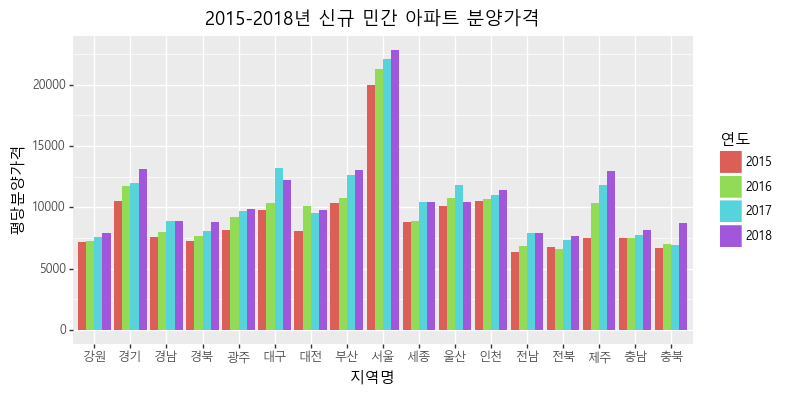

<ggplot: (-9223371887581138572)>

In [133]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family=font_name),
        figure_size=(8, 4))
)

# 지역별 평당 분양가격 합계
-아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지 보기 .

-전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요 있음.

In [135]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,899","13,647","9,226","8,616","10,296","12,334","14,282","12,590","22,058","9,292","9,974","13,836","7,568","7,842","10,416","8,478","7,933"
전용면적 60㎡이하,"7,195","12,385","8,343","7,661","8,518","11,285","8,798","10,707","22,046","9,107","8,965","10,870","6,991","7,232","14,700","7,782","6,969"
전용면적 60㎡초과 85㎡이하,"7,228","11,691","8,110","7,690","9,176","10,931","8,807","11,191","20,781","9,272","10,641","10,748","6,968","6,891","9,943","7,504","7,044"
전용면적 85㎡초과 102㎡이하,"7,686","12,130","9,822","8,776","9,296","9,589","9,037","11,039","23,754","9,245","8,861","11,267","7,882","7,770","10,739","9,090","8,171"
전체,"7,197","11,706","8,137","7,696","9,167","10,897","8,880","11,295","21,169","9,263","10,619","10,739","6,982","6,902","10,253","7,494","6,994"


## 규모별

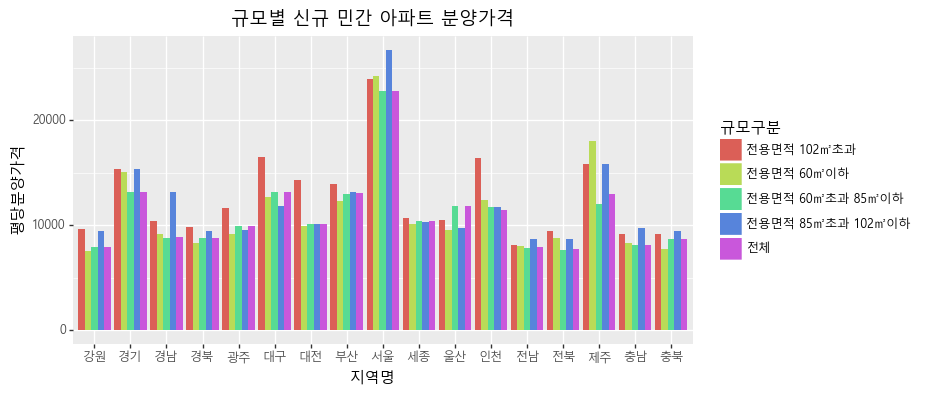

<ggplot: (-9223371887581115227)>

In [137]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옴.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family=font_name),
         figure_size=(8, 4))
)

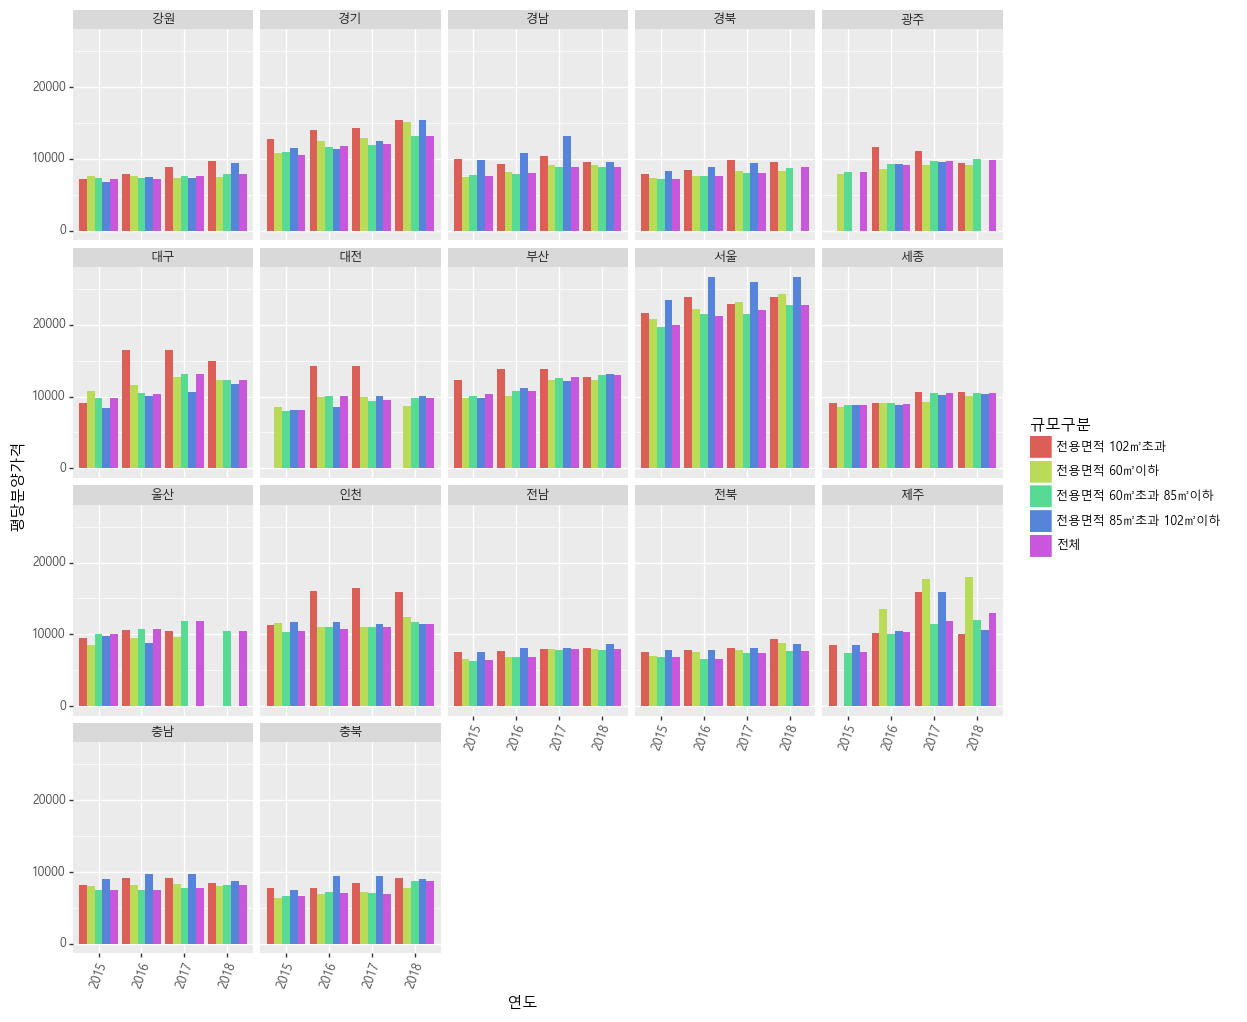

<ggplot: (149273887636)>

In [138]:
# 위에 그린 그래프 지역별로 나눠보기.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family=font_name),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

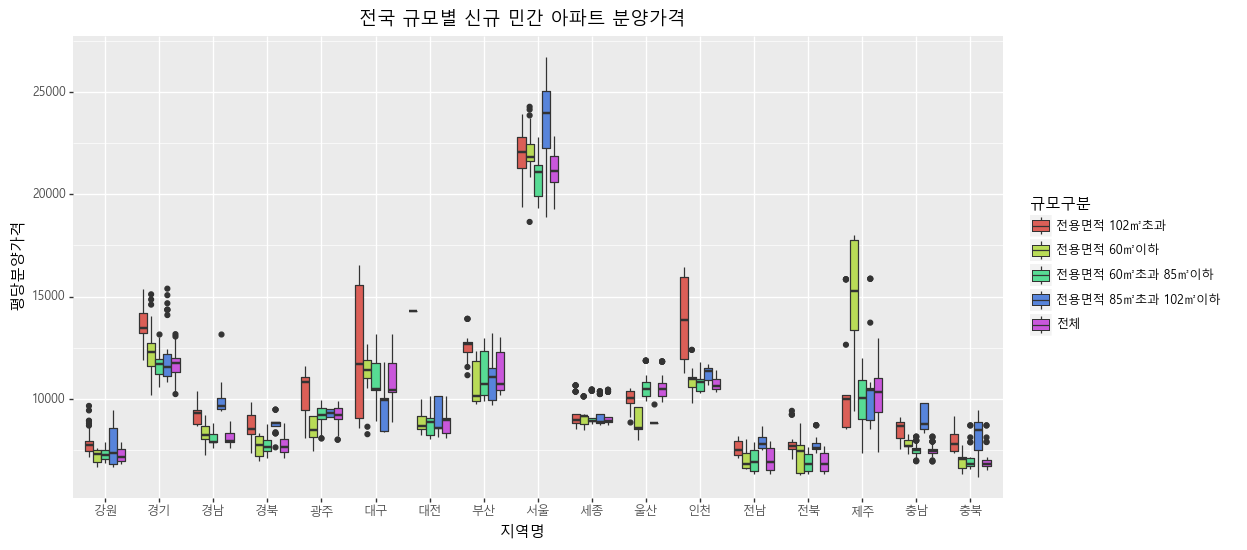

<ggplot: (149273888688)>

In [139]:
# 박스플롯 그리기.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family=font_name),
         figure_size=(12, 6))
)

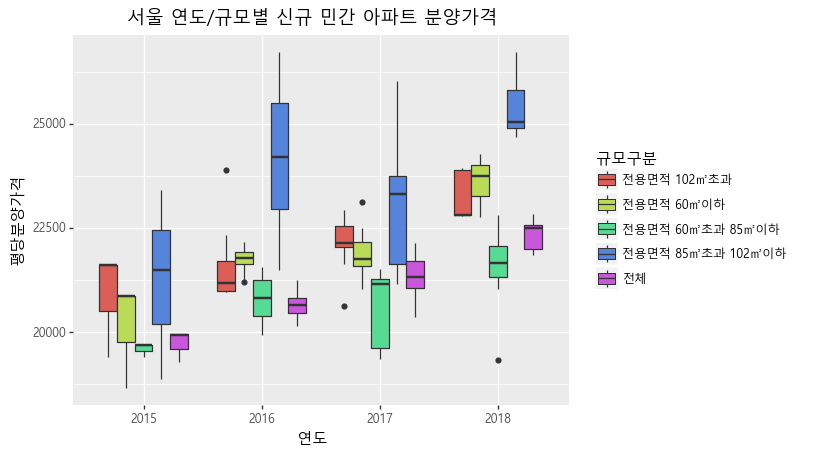

<ggplot: (149275997574)>

In [140]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)


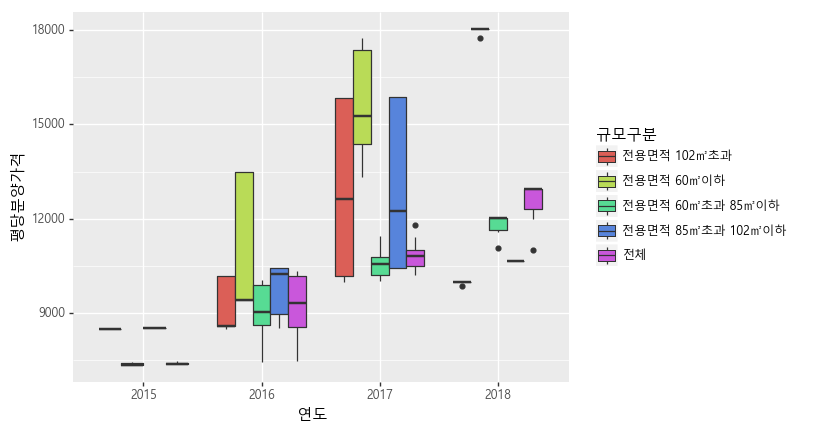

<ggplot: (-9223371887580890515)>

In [141]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)

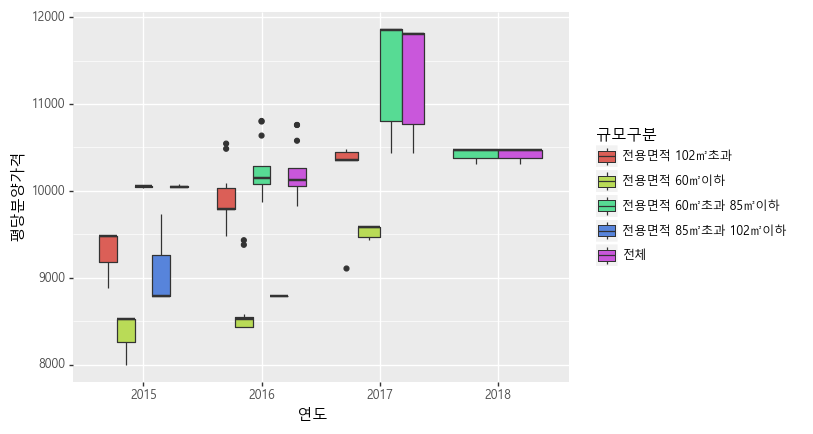

<ggplot: (149273887906)>

In [142]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산.
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보인것이였음.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)

# Tidy Data 만들기
###### Tidy Data: 데이터 맞추기(데이터를 조작,모델링,시각화하기 편하게 만들어주는것)

2013년 12월~2015년 9월 3.3㎡당 분양가격

2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.

규모구분은 없으니까 지역,연도,월,분양가격을 맞춰주면 될것같음 

In [146]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0) #윗줄의 필요없는 row하나 지움
df.shape

(23, 27)

In [209]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281,광주
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,145","8,272","8,079","8,079","8,079","7,917",68,610,414,대전
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"9,380","9,192","9,190","9,190","9,215","9,215",0,324,722,울산
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352,
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160,경기


##### 데이터 프레임 모습을 보고 가장 먼저 해야할 것은?
0,1번째 줄의 연과 월을 한줄로 합쳐주자
그런 다음 이전의 데이터와 같이 맞춰줘야하니까 연과 월을 두개의 칼럼으로 다시 나눠줘야함

In [149]:
year = df.iloc[0]
month = df.iloc[1]
#행과 열 추출할땐:loc(명을 기준으로),iloc(index 기준으로)

In [150]:
# 우선 year을 보자-> 많이 나온 결측치들을 채워준다.
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [151]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year): 
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
#for문처럼 반복되는 구간에서 객체가 현재 어느 위치에 있는지 알려주는 
#인덱스 값이 필요할때 enumerate 함수를 사용하면 매우 유용        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [152]:
df.columns = year
#컬럼 지정 

In [153]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [154]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [155]:
df['지역'] = df['구분'] + df['시군구']

In [156]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [157]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [158]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

#melt 사용법
#import pandas as pd
#df_b = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
#df_a의 'A' 컬럼을 기준으로 두고 'B', 'C'는 variable 컬럼에 구분자로 넣고 
#'B', 'C' 컬럼의 값은 value 컬럼에 값으로 넣어 df_b 만들기

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [159]:
df_2013_2015.columns = ['지역', '기간', '분양가']

df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [160]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0]) #기간에서 '년'이라는 단어로 split을 해서 0번째 값(ex) '2013')을 기간의 연도에 넣어줌 
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip()) #년이랑 단어로 split해서 1번째 값( ex) ' 12월)을 공백이 있으니까 strip을 해서(ex) '12월') 월로 나눠서(ex) '12') 월에다가 넣어줌  

#ex)
#print(re.sub('\d{4}', 'XXXX', '010-1234-5678'))
#결과 010-XXXX-XXXX
#re.sub(정규표현식)은 패턴에 일치되는 문자열은 다른 문자열로 바꿔주는 것 (\d{4}'->'XXXX)

In [161]:

df_2013_2015.head()


,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산 정리

In [163]:
df_2013_2015['지역'].value_counts()

           44
전남         22
전국         22
대전         22
세종         22
충북         22
충남         22
전북         22
경북         22
대구         22
지방강원       22
경남         22
울산         22
서울         22
6대광역시부산    22
제주         22
인천         22
광주         22
수도권        22
경기         22
Name: 지역, dtype: int64

In [164]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

       44
전남     22
전국     22
대전     22
세종     22
충북     22
충남     22
전북     22
부산     22
경북     22
강원     22
경기     22
경남     22
울산     22
서울     22
제주     22
인천     22
광주     22
수도권    22
대구     22
Name: 지역, dtype: int64

In [165]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 8월,"8,067",2014,9
freq,44,21,7,252,42


In [166]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


In [167]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

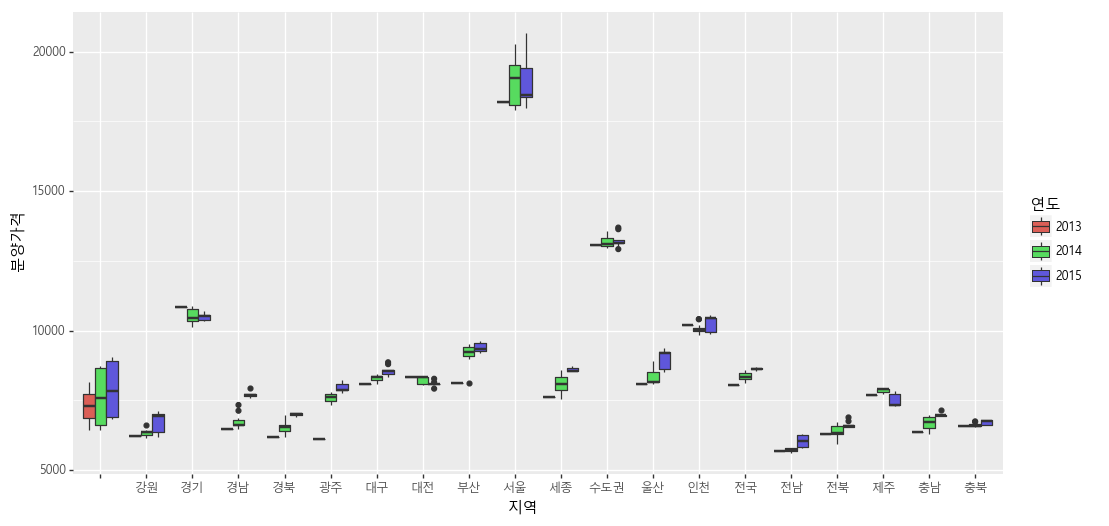

<ggplot: (-9223371887579127145)>

In [176]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family=font_name),
         figure_size=(12, 6))
)

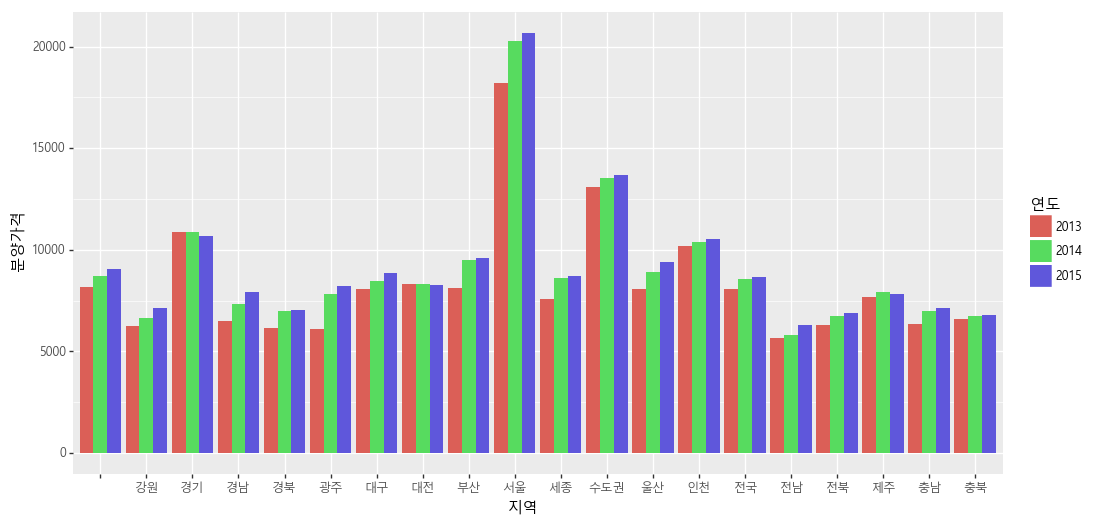

<ggplot: (-9223371887578870440)>

In [173]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_name),
         figure_size=(12, 6))
)

## 이제 2013년부터 2018년 7월까지 데이터를 합칠 준비가 됨

In [181]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체'] #2013~2015는 규모구분이 없어서 전체인거만 가져오기
print(df_2015_2018.shape)
df_2015_2018.head()


(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [182]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [183]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [184]:

df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [185]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [186]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']] #쓸 것만 가져오기
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [187]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561
mean,"9,729"
std,"3,367"
min,"6,300"
25%,"7,498"
50%,"8,973"
75%,"10,560"
max,"22,833"


In [188]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare]) #concat으로 위아래로 붙여주기
df_2013_2018.shape

(1040, 4)

In [189]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [190]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"
2885,제주,2018,7,"11,002"


In [191]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique() #unique로 중복처리해서 고유값들만 보기 
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [192]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [193]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region 
#다른거 찾기

['전국', '', '수도권']

In [194]:
df_2013_2018.shape

(1040, 4)

In [195]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [197]:

df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

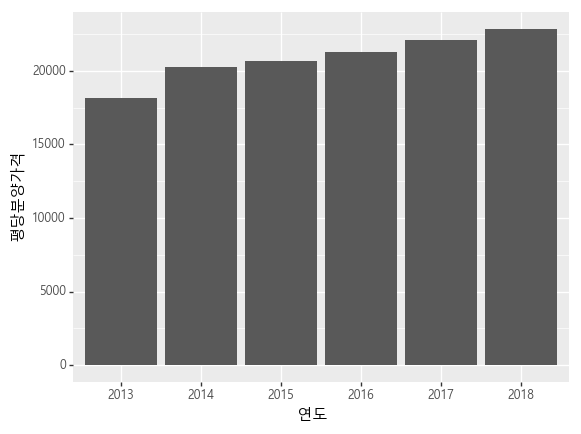

<ggplot: (-9223371887581132400)>

In [199]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_name))
)


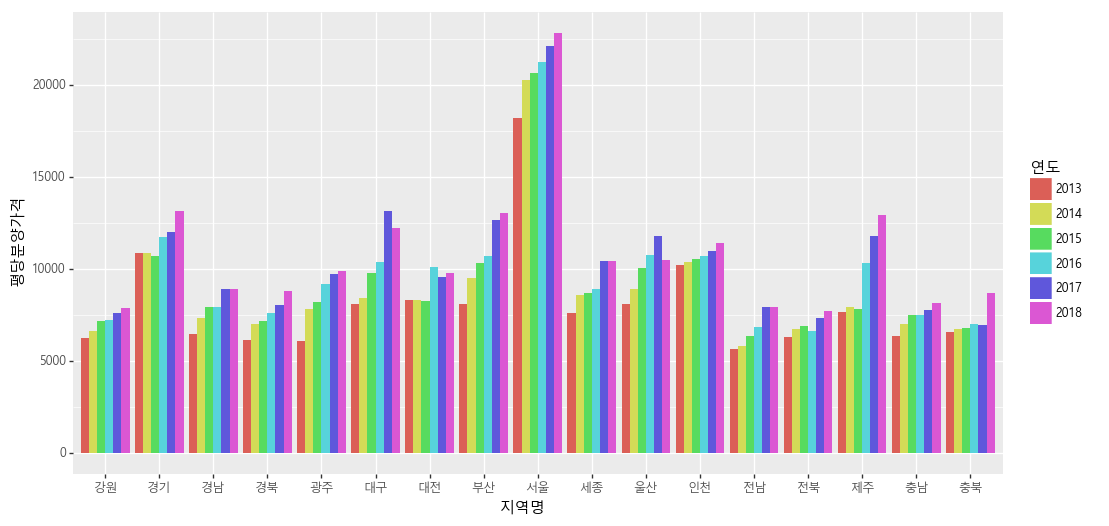

<ggplot: (149273952467)>

In [200]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family=font_name),
         figure_size=(12, 6))
)


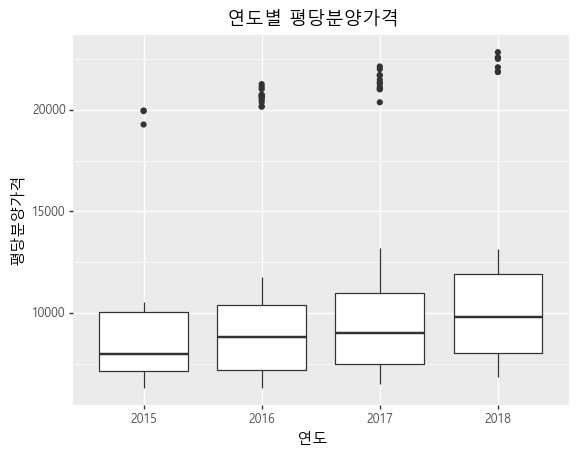

<ggplot: (149275338935)>

In [201]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)

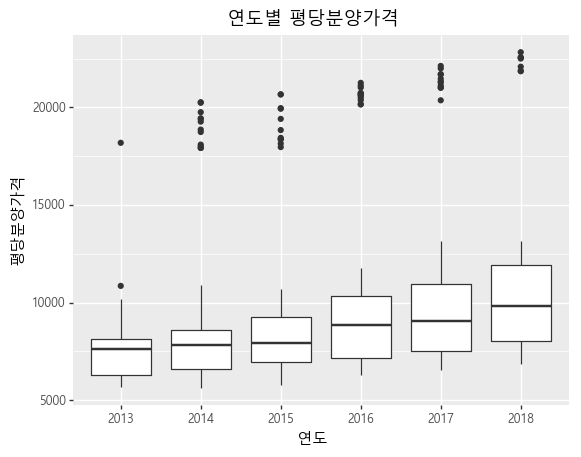

<ggplot: (149275730033)>

In [202]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)

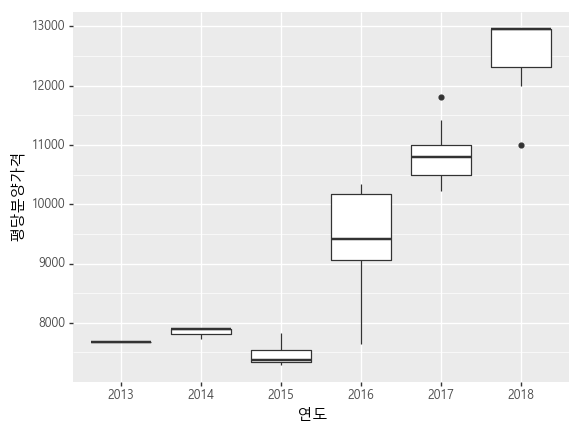

<ggplot: (149274125839)>

In [206]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family=font_name))
)


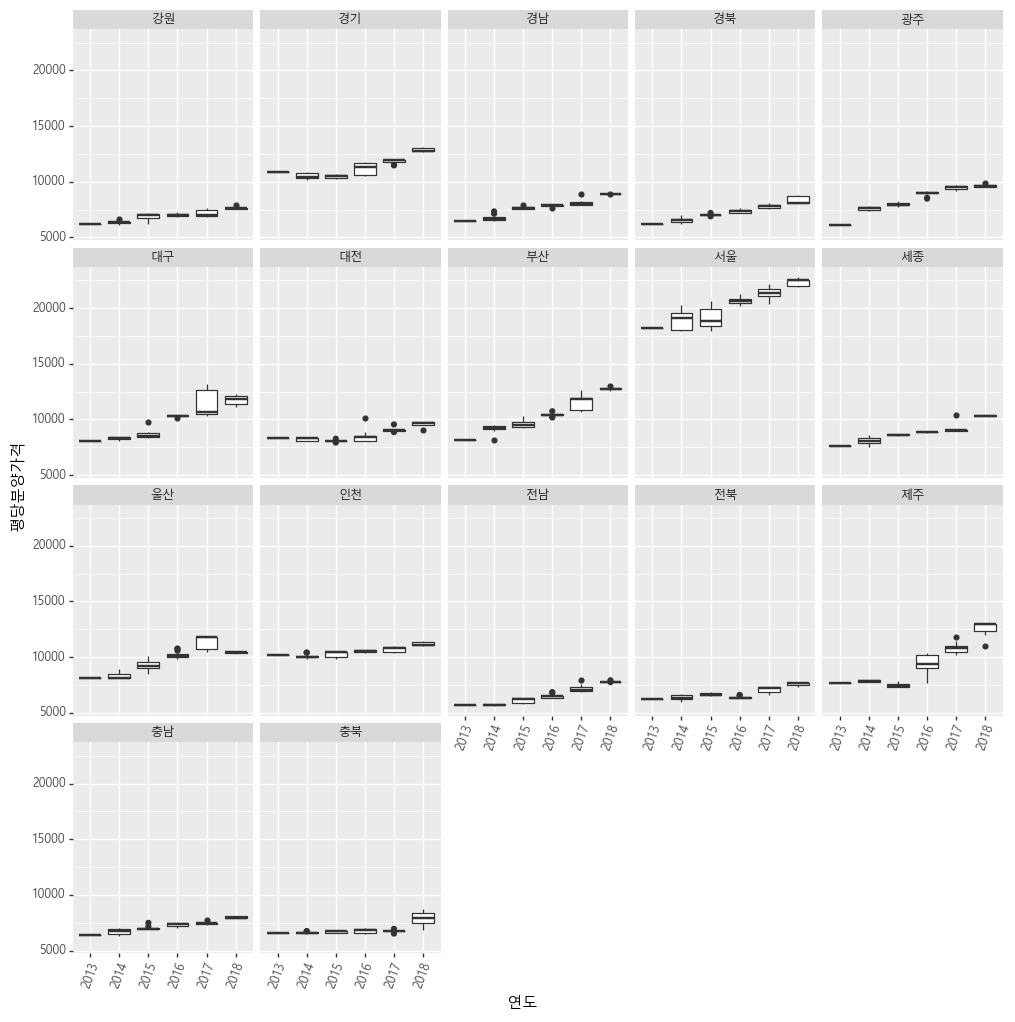

<ggplot: (-9223371887578821267)>

In [208]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family=font_name),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)
